## Project_2

## Regression

### Part A Regularized Linear Regression

Description:
We will try to predict "adiposity" which refers to the body fat percentage.
We choose this because we have indicators that the other attributes will be able to predict it (check correlations-> high numbers).
Also, it follows a normal distribution so we will not have troubles with that.

In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data?fbclid=IwAR0bnadUy7l7_jwPgJzAW1Dg5RM_JyAKv_doOWxuP2Fx2XpkTAliWHRl73U') 

#### Data cleaning

In [4]:
# drop unnecessary name variable
data.drop(columns = 'row.names',inplace=True)
# one hot enc of categorical variable famhist
df_famhist = pd.get_dummies(data['famhist'],prefix="famhist")
data.drop(columns = 'famhist',inplace=True)
data = pd.concat([data, df_famhist], axis=1)

df_chd = pd.get_dummies(data['chd'],prefix="chd")
data.drop(columns = 'chd',inplace=True)
data = pd.concat([data, df_chd], axis=1)


print(data.columns)

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'famhist_Absent', 'famhist_Present', 'chd_0', 'chd_1'],
      dtype='object')


In [5]:
X = data.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]
X_data_columns = X.columns
y = data.iloc[:,[3]]

##### Standardize the data (mean=0, std=1)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X = StandardScaler().fit_transform(X)
#X = X.to_numpy()
y = y.to_numpy()

In [8]:
#### Model


In [9]:
##### Cross validation

In [10]:
from sklearn import model_selection
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  # it's linear regression with l2 regularization
#from sklearn.linear_model import RidgeCV  # it's linear regression with l2 regularization CV stands for cross validation
import numpy as np
from sklearn.metrics import mean_squared_error

In [11]:
K = 10
CV = model_selection.KFold(K, shuffle=True)

In [12]:
generalization_err_per_model = {}
training_err_per_model = {}
lambdas = np.power(10.,range(-5,9))
#lambdas= np.append(lambdas,[2,4,6,8])
lambdas = np.sort(lambdas)

# train_data_x, train_data_y, test_data_x, test_data_y, test_data, lambda_value, model, train_error, test_error
models_info = []

for lambda_value in lambdas:
    generalization_err_per_model[lambda_value]=[]
    training_err_per_model[lambda_value]=[]

for train_index, test_index in CV.split(X,y):
    # extract training and test set for current CV fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for lambda_value in lambdas:
        model = Ridge(alpha=lambda_value)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        generalization_err = mean_squared_error(y_test, y_pred, squared=True)
        generalization_err_per_model[lambda_value].append(generalization_err)

        y_pred = model.predict(X_train)
        training_err = mean_squared_error(y_train, y_pred, squared=True)
        training_err_per_model[lambda_value].append(mean_squared_error(y_train, y_pred, squared=True))
        models_info.append([X_train,y_train,X_test,y_test,lambda_value,model,training_err,generalization_err])
        #models_info.append(lambda_value)


In [13]:
# avg_generalization_err_per_lambda_value = {}
# for lambda_value, errors in generalization_err_per_model.items():
#     avg_generalization_err_per_lambda_value[lambda_value] = sum(errors)/len(errors)
# avg_generalization_err_per_lambda_value = list(avg_generalization_err_per_lambda_value.values())

# avg_training_err_per_lambda_value = {}
# for lambda_value, errors in training_err_per_model.items():
#     avg_training_err_per_lambda_value[lambda_value] = sum(errors)/len(errors)
# avg_training_err_per_lambda_value = list(avg_training_err_per_lambda_value.values())

# optimal_lambda = np.argmin(avg_generalization_err_per_lambda_value)


In [33]:
# #Find best labdba_value based on average generalazation error
# # list of K elements where each element is a list of K model info with same lambda_value
models_grouped_by_lambda_value = [models_info[i::len(lambdas)] for i in range(len(lambdas))]

# # list of K elements where each element is  a tuple with (argmin of model with min gen_err, avg_gen_err so that we can find the best avg gen_err)
# argmin_and_avg_gen_error = [ (np.argmin([model[7] for model in model_group]),np.average([model[7] for model in model_group])) for model_group in models_grouped_by_lambda_value]

# # index of the minimum avg_gen_err so that we can pick best lambda
# argmin_of_gen_errors = np.argmin(np.array(argmin_and_avg_gen_error)[:,1])
# optimal_lambda = lambdas[argmin_of_gen_errors]
# print(f'Optimal Lambda: {optimal_lambda}')


avg_generalization_err_per_lambda_value = [ np.average([model_info[7] for model_info in group]) for group in models_grouped_by_lambda_value]
avg_training_err_per_lambda_value =  [ np.average([model_info[6] for model_info in group]) for group in models_grouped_by_lambda_value]

# # #Find best model
# argmin_best_model = np.argmin([model[7] for model in models_grouped_by_lambda_value[argmin_of_gen_errors]])
# best_model_info = models_grouped_by_lambda_value[argmin_of_gen_errors][argmin_best_model][:]
# print(f'Best model train err: {round(best_model_info[6],4)} gen err: {round(best_model_info[7],4)}')


def find_best_regularized_model(models_info):
    models_grouped_by_lambda_value = [models_info[i::len(lambdas)] for i in range(len(lambdas))]
    argmin_and_avg_gen_error = [ (np.argmin([model[7] for model in model_group]),np.average([model[7] for model in model_group])) for model_group in models_grouped_by_lambda_value]
    argmin_of_gen_errors = np.argmin(np.array(argmin_and_avg_gen_error)[:,1])
    optimal_lambda = lambdas[argmin_of_gen_errors]
    print(f'Optimal Lambda: {optimal_lambda}')
    argmin_best_model = np.argmin([model[7] for model in models_grouped_by_lambda_value[argmin_of_gen_errors]])
    best_model_info = models_grouped_by_lambda_value[argmin_of_gen_errors][argmin_best_model][:]
    print(f'Best model train err: {round(best_model_info[6],4)} gen err: {round(best_model_info[7],4)}')
    return best_model_info
best_model_info = find_best_regularized_model(models_info)


def find_best_regularized_model_2_cross(models_info):
    models_grouped_by_lambda_value = [models_info[i::len(lambdas)] for i in range(len(lambdas))]
    #print(models_grouped_by_lambda_value)
    argmin_and_avg_gen_error = [ (np.argmin([model[2] for model in model_group]),np.average([model[2] for model in model_group])) for model_group in models_grouped_by_lambda_value]
    argmin_of_gen_errors = np.argmin(np.array(argmin_and_avg_gen_error)[:,1])
    optimal_lambda = lambdas[argmin_of_gen_errors]
    print(f'Optimal Lambda: {optimal_lambda}')
    argmin_best_model = np.argmin([model[2] for model in models_grouped_by_lambda_value[argmin_of_gen_errors]])
    best_model_info = models_grouped_by_lambda_value[argmin_of_gen_errors][argmin_best_model][:]
    print(f'Best mode gen err: {round(best_model_info[2],4)}')

Optimal Lambda: 10.0
Best model train err: 17.7917 gen err: 8.6556


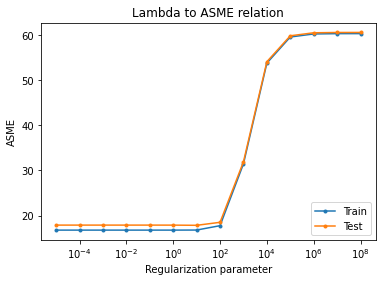

In [35]:
import matplotlib.pyplot as plt

plt.semilogx(lambdas, avg_training_err_per_lambda_value, label="Train", marker = ".")
plt.semilogx(lambdas, avg_generalization_err_per_lambda_value, label="Test", marker = "." )
plt.legend(loc="lower right")
plt.xlabel("Regularization parameter")
plt.ylabel("ASME")
plt.title("Lambda to ASME relation")
plt.show()


Below he have the coefficients of the attriutes that we are using.
Keep in mind if you see an extra coef then it is just the interecept that I might decided to include.

In [28]:
print(best_model_info[5].coef_[0])
print(list(X_data_columns))

[ 0.40045856  0.01588855  1.04877848 -0.39027877  4.01217666  0.25997517
  2.99612436 -0.00448548  0.00448548 -0.06350243  0.06350243]
['sbp', 'tobacco', 'ldl', 'typea', 'obesity', 'alcohol', 'age', 'famhist_Absent', 'famhist_Present', 'chd_0', 'chd_1']


### Part B Regression comparison

In [29]:
from sklearn.dummy import DummyRegressor

In [30]:
baseline_regr = DummyRegressor(strategy="mean")

In [34]:
# two level cross validation
K1 = 10
K2 = 10

baseline_model_info = {}
regularized_model_info = {}
ann_model_info = {}

#outer
outer_index = -1
for par_index, test_index in CV.split(X,y):
    X_par, X_test = X[par_index], X[test_index]
    y_par, y_test = y[par_index], y[test_index]
    
    outer_index = outer_index + 1
    baseline_model_info[outer_index]= []
    regularized_model_info[outer_index] = []
    ann_model_info[outer_index] = []
    
    
    #inner
    for train_index, test_index in CV.split(X_par,y_par):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #baseline
        baseline_regr = DummyRegressor(strategy="mean")
        baseline_regr.fit(X, y)
        y_pred = baseline_regr.predict(X_test)
        validation_err = mean_squared_error(y_test, y_pred, squared=True)        
        #model model, val_error
        baseline_model_info[outer_index].append([baseline_regr,validation_err])
        #baseline_model_info.append([baseline_regr,validation_err])
        
        # regularized model
        for lambda_value in lambdas: 
            regularized_regr = Ridge(alpha=lambda_value)
            regularized_regr.fit(X_train, y_train)
            # lambda_value, model model, val_error
            y_pred = model.predict(X_test)
            validation_err = mean_squared_error(y_test, y_pred, squared=True)
            regularized_model_info[outer_index].append([lambda_value,regularized_regr,validation_err])
            #regularized_model_info.append([lambda_value,regularized_regr,validation_err])
        
        #ANN
    find_best_regularized_model_2_cross(regularized_model_info[outer_index])

Optimal Lambda: 1e-05
Best mode gen err: 41.6928
Optimal Lambda: 1e-05
Best mode gen err: 44.2948
Optimal Lambda: 1e-05
Best mode gen err: 28.8613
Optimal Lambda: 1e-05
Best mode gen err: 43.5686
Optimal Lambda: 1e-05
Best mode gen err: 46.4994
Optimal Lambda: 1e-05
Best mode gen err: 40.4591
Optimal Lambda: 1e-05
Best mode gen err: 36.3716
Optimal Lambda: 1e-05
Best mode gen err: 48.5221
Optimal Lambda: 1e-05
Best mode gen err: 45.3976
Optimal Lambda: 1e-05
Best mode gen err: 40.6305
